DOMAIN: Sports
CONTEXT: Company X manages the men's top professional basketball division of the American league system. 
The dataset contains information on all the teams that have participated in all the past tournaments. It has data 
about how many baskets each team scored, conceded, how many times they came within the first 2 positions, 
how many tournaments they have qualified, their best position in the past, etc.
• DATA DESCRIPTION: Basketball.csv - The data set contains information on all the teams so far participated in 
all the past tournaments.
• ATTRIBUTE INFORMATION:
1. Team: Team’s name
2. Tournament: Number of played tournaments.
3. Score: Team’s score so far.
4. PlayedGames: Games played by the team so far.
5. WonGames: Games won by the team so far.
6. DrawnGames: Games drawn by the team so far.
7. LostGames: Games lost by the team so far.
8. BasketScored: Basket scored by the team so far.
9. BasketGiven: Basket scored against the team so far.
10. TournamentChampion: How many times the team was a champion of the tournaments so far.
11. Runner-up: How many times the team was a runners-up of the tournaments so far.
12. TeamLaunch: Year the team was launched on professional basketball.
13. HighestPositionHeld: Highest position held by the team amongst all the tournaments played.
• PROJECT OBJECTIVE: Company’s management wants to invest on proposal on managing some of the best 
teams in the league. The analytics department has been assigned with a task of creating a report on the 
performance shown by the teams. Some of the older teams are already in contract with competitors. Hence 
Company X wants to understand which teams they can approach which will be a deal win for them.
Steps and tasks: [ Total Score: 15 points]
1. Read the data set, clean the data and prepare a final dataset to be used for analysis.
2. Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get a data 
driven insights on recommending which teams they can approach which will be a deal win for them.. Also as a data 
and statistics expert you have to develop a detailed performance report using this data.
Hint: Use statistical techniques and visualisation techniques to come up with useful metrics and reporting. Find out 
the best performing team, oldest team, team with highest goals, team with lowest performance etc. and many more. 
These are just random examples please use your best analytical approach to build this report. You can mix match 
columns to create new ones which can be used for better analysis. Create your own features if required. Be highly 
experimental and analytical here to find hidden patterns. Use graphical interactive libraries to enable you to publish 
interactive plots in python. 
3. Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, 
veracity etc. on the data points collected by the association to perform a better data analysis in future.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('DS - Part2 - Basketball.csv')

In [3]:
df.shape

(61, 13)

In [4]:
df.info()
# Todo: Convert object datatype to numeric wherever possible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [5]:
df = df.replace('-',0)

In [6]:
df['TeamLaunch'] = df['TeamLaunch'].str.strip().str[:4]

In [7]:
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [8]:
df['WonGames'] = pd.to_numeric(df['WonGames'])
df['PlayedGames'] = pd.to_numeric(df['PlayedGames'])
df['LostGames'] = pd.to_numeric(df['LostGames'])
df['Score'] = pd.to_numeric(df['Score'])
df['BasketScored'] = pd.to_numeric(df['BasketScored'])
df['TournamentChampion'] = pd.to_numeric(df['TournamentChampion'])
df['Runner-up'] = pd.to_numeric(df['Runner-up'])
df['TeamLaunch'] = pd.to_numeric(df['TeamLaunch'])

In [9]:
df = df[:-1]

In [10]:
df.shape

(60, 13)

In [11]:
df.sample(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
31,Team 32,14,353,426,129,95,202,492,720,0,0,1943,4
44,Team 45,7,107,130,43,21,66,227,308,0,0,1929,3
32,Team 33,12,343,448,104,127,217,393,662,0,0,1977,12
50,Team 51,3,71,90,29,13,48,121,183,0,0,1953,14
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
49,Team 50,4,76,108,30,16,62,145,252,0,0,1945,10
25,Team 26,20,538,628,184,149,295,716,1050,0,0,1935,5
30,Team 31,12,375,423,123,102,198,422,581,0,0,1974,7
15,Team 16,37,1351,1318,426,327,565,1500,1834,0,0,1935,4


In [12]:
df.describe()

,Tournament,Score,PlayedGames,WonGames,LostGames,BasketScored,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,308.816667,1159.350000,1.45000,1.433333,1957.950000,7.050000
std,26.884620,1138.342899,877.465393,408.481395,294.508639,1512.063948,5.51554,4.574679,26.646732,5.315232
min,1.000000,14.000000,30.000000,5.000000,15.000000,34.000000,0.00000,0.000000,1929.000000,1.000000
25%,4.000000,104.250000,115.500000,34.750000,62.750000,154.500000,0.00000,0.000000,1934.750000,3.000000
50%,12.000000,395.500000,424.500000,124.000000,197.500000,444.000000,0.00000,0.000000,1950.500000,6.000000
75%,39.000000,1360.500000,1345.500000,432.750000,563.500000,1669.750000,0.00000,0.000000,1977.250000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,1070.000000,5947.000000,33.00000,25.000000,2016.000000,20.000000


In [13]:
df['win_percentage'] = df['WonGames']/df['PlayedGames']
df['lose_percentage'] = df['LostGames']/df['PlayedGames']

In [14]:
highest_wins = df.nlargest(10,'win_percentage')[['win_percentage','Team']]
highest_wins

,win_percentage,Team
0,0.596307,Team 1
1,0.572411,Team 2
2,0.474751,Team 3
3,0.445571,Team 4
4,0.437726,Team 5
20,0.411765,Team 21
5,0.411130,Team 6
7,0.375326,Team 8
10,0.367974,Team 11
6,0.361005,Team 7


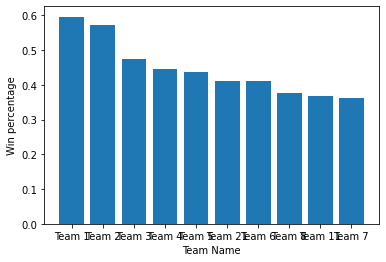

In [15]:
plt.bar(highest_wins['Team'], highest_wins['win_percentage'])
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Team Name')
plt.ylabel('Win percentage')
plt.show()

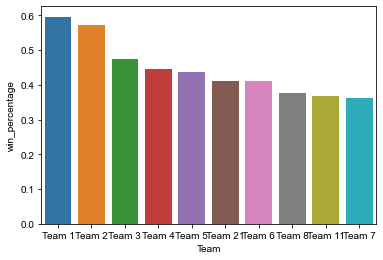

In [16]:
# Same thing in seaborn
sns.barplot(x='Team',y='win_percentage',data=highest_wins)
sns.set(rc={'figure.figsize':(11,8.27)})

#Team 1 has the best Win Percentage

In [17]:
#Loss percentage should be low

lowest_losses = lowest_losses = df.nsmallest(10,'lose_percentage')[['lose_percentage','Team']]
lowest_losses

,lose_percentage,Team
0,0.203838,Team 1
1,0.220130,Team 2
2,0.296480,Team 3
20,0.321981,Team 21
3,0.323198,Team 4
4,0.333092,Team 5
5,0.368355,Team 6
7,0.374023,Team 8
10,0.375817,Team 11
8,0.385700,Team 9


<AxesSubplot:xlabel='Team', ylabel='lose_percentage'>

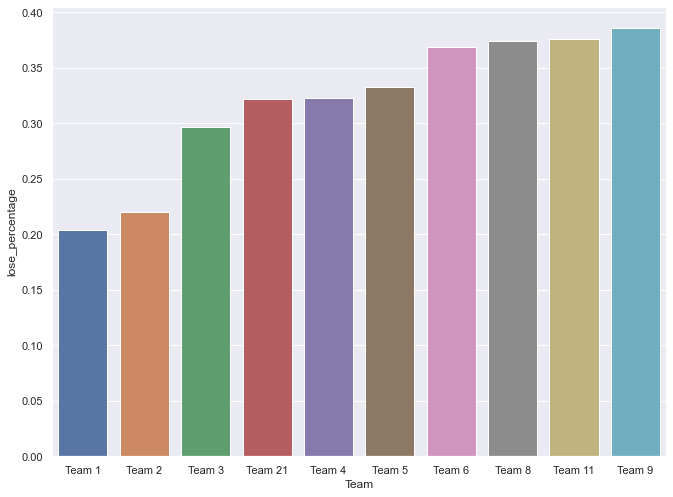

In [18]:
sns.barplot(x='Team',y='lose_percentage',data=lowest_losses)
#Team 1 outperforms other teams

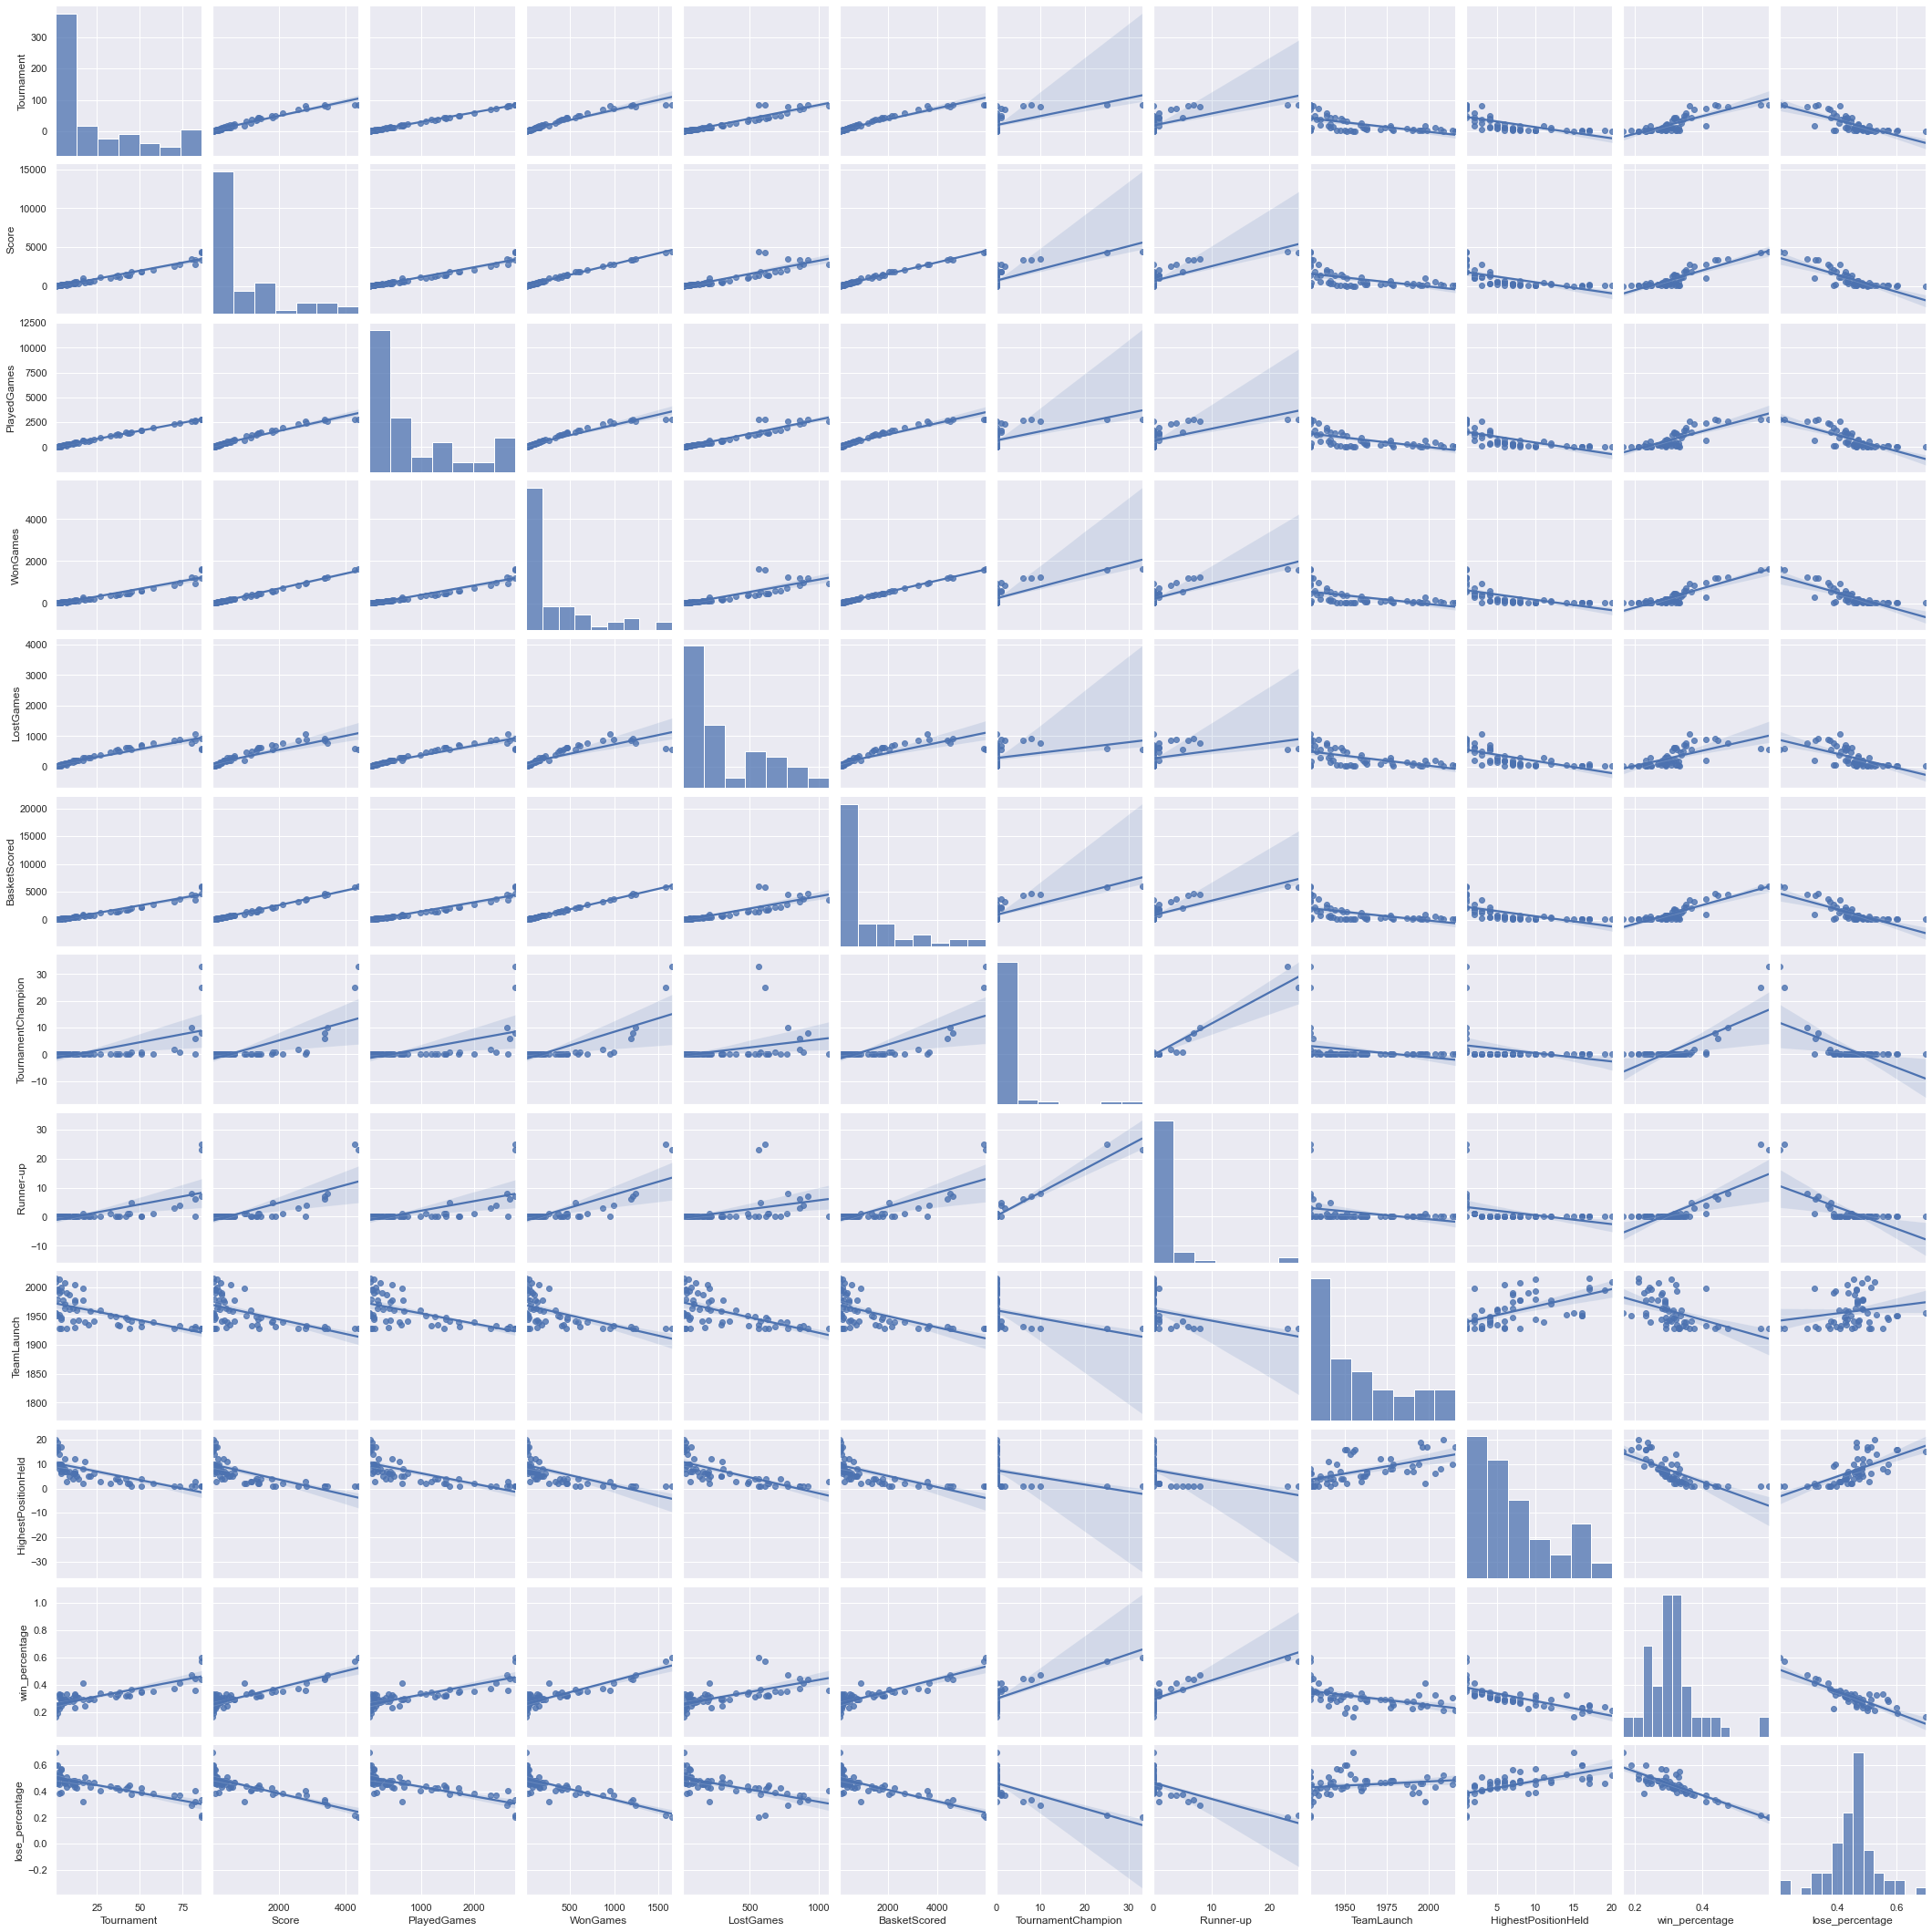

In [19]:
sns.pairplot(df, kind='reg')
plt.show()
#lol i cant see anything

<AxesSubplot:xlabel='PlayedGames', ylabel='WonGames'>

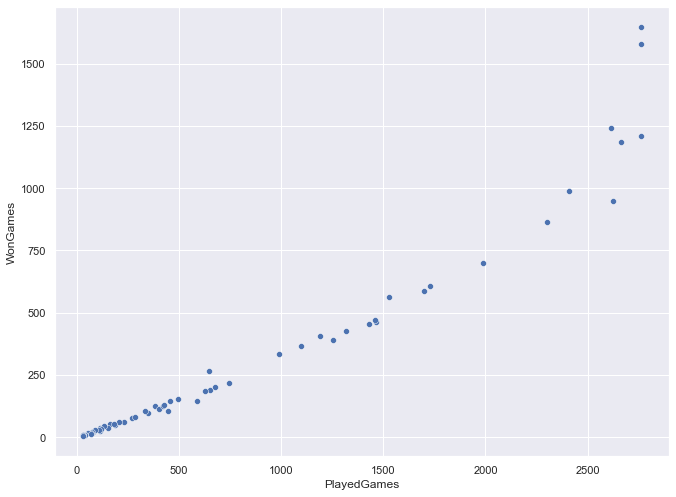

In [20]:
#Percentage of games played since launch
sns.scatterplot(data=df, x="PlayedGames", y="WonGames")

<AxesSubplot:xlabel='PlayedGames', ylabel='LostGames'>

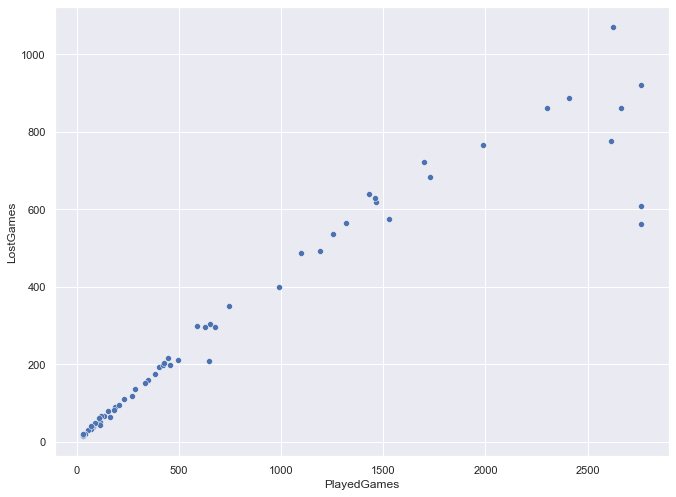

In [21]:
sns.scatterplot(data=df, x="PlayedGames", y="LostGames")

In [22]:
import plotly.express as px
fig = px.scatter(df, x="PlayedGames", y="LostGames", color="Team",hover_data=['Team'])
fig.show()
#Team 1 and team 2 have played a lot of games and lost less comparitively

ModuleNotFoundError: No module named 'plotly'

In [ ]:
fig = px.scatter(df, x="PlayedGames", y="BasketScored", color="Team",hover_data=['Team'])
fig.show()

In [ ]:
# Teams which have been tournament champions
tournament_won = df[df['TournamentChampion']!=0]
tournament_won

In [ ]:
fig = px.bar(tournament_won, x='Team', y='TournamentChampion', color='WonGames')
fig.show()
#Team 1 has won most tournaments and has played most games followed by team 2

In [ ]:
#Teams which have held the first position
df[df['HighestPositionHeld']==1]

In [ ]:
df['BasketGiven'] = pd.to_numeric(df['BasketGiven'])
df['Ratio of Basket Scored to Given'] = df['BasketScored']/df['BasketGiven']
# Ratio of Basket Scored to Baskets Given should be high

In [ ]:
# Filter only teams who have scored more baskets than given.
df[df['Ratio of Basket Scored to Given'] >=1]

In [ ]:
# Which are the oldest teams?
fig = px.scatter(df, x="TeamLaunch", y="win_percentage", color="Team",hover_data=['Team'])
fig.show()
#Some Oldest teams have a greater win percentage probably due to better expierience over time. 

In [ ]:
# info()
# not null
# missing values - replace with some random number

# dtypes - need to convert in interger
# drop unwanted column
# use astype
# string manipulation

# EDA
# df.desc()
# pairplot - multi var
# scatteredplot, jointplot, pointplot - bivariate
# countplot, boxplot, histogram, barcharts - univariate

In [ ]:
sns.distplot(df['win_percentage'], kde=True, color='red')
# It is a positively skewed Distribution.

In [ ]:
sns.violinplot(df['win_percentage'])

In [ ]:
# Idk if this is correct
import statsmodels.api as sm
import pylab

# test = np.random.normal(0,1, 1000)

sm.qqplot(df['win_percentage'], line='s')
pylab.show()

In [ ]:
df.head()

In [ ]:
fig = px.box(df, y="win_percentage")
fig.show()
#Median is around 30%

In [ ]:
fig = px.box(df, y="lose_percentage")
fig.show()

In [ ]:
corr_matrix=df.corr()

In [ ]:
sns.heatmap(corr_matrix, annot=True)
# There is a perfect correlation between basket scored and won games. 
# Total score is highly correlated to number of games played, number of games won and total basket scored. 
# There is a high negative correlation between total score and lose percentage. 
# Teams which have given more baskets than scored have a higher lose percentage and vice versa. 

In [25]:
df.median()

Tournament               12.000000
Score                   395.500000
PlayedGames             424.500000
WonGames                124.000000
DrawnGames               98.500000
LostGames               197.500000
BasketScored            444.000000
BasketGiven             632.500000
TournamentChampion        0.000000
Runner-up                 0.000000
TeamLaunch             1950.500000
HighestPositionHeld       6.000000
win_percentage            0.304917
lose_percentage           0.457271
dtype: float64

In [24]:
df.quantile(0.25)

Tournament                4.000000
Score                   104.250000
PlayedGames             115.500000
WonGames                 34.750000
LostGames                62.750000
BasketScored            154.500000
TournamentChampion        0.000000
Runner-up                 0.000000
TeamLaunch             1934.750000
HighestPositionHeld       3.000000
win_percentage            0.276075
lose_percentage           0.411430
Name: 0.25, dtype: float64

In [23]:
df.quantile(0.75)
#3/4th teams have total score less than 1360. 

Tournament               39.000000
Score                  1360.500000
PlayedGames            1345.500000
WonGames                432.750000
LostGames               563.500000
BasketScored           1669.750000
TournamentChampion        0.000000
Runner-up                 0.000000
TeamLaunch             1977.250000
HighestPositionHeld      10.000000
win_percentage            0.335402
lose_percentage           0.485424
Name: 0.75, dtype: float64

In [26]:
df.skew()

Tournament             1.197176
Score                  1.574104
PlayedGames            1.123454
WonGames               1.786067
DrawnGames             0.984899
LostGames              0.880596
BasketScored           1.758058
BasketGiven            0.958164
TournamentChampion     4.734845
Runner-up              4.321794
TeamLaunch             0.682570
HighestPositionHeld    0.832164
win_percentage         1.440046
lose_percentage       -0.268561
dtype: float64